In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals, inv, eig
%matplotlib inline

FS = $\lambda$ MS
######  
M-1 FS =  $\lambda$ S

In [139]:

def main(f = 1 #spring constant
         , m1 = 0.4, m2 = 1.0, **kwargs):
    mat1 =  lambda q: np.array([[            2*f,    -f,    0, -f*np.exp(-1j*q)],
                                [             -f,   2*f,   -f,                0],
                                [              0,    -f,  2*f,               -f],
                                [-f*np.exp(1j*q),     0,   -f,              2*f]])
    
    #massmat = np.diag([m2, m1, m1, m1]) # shape = 4x4
    #massmat = np.diag([m1, m2, m1, m1])
    #massmat = np.diag([m1, m2, m2, m1])
    massmat = np.diag([m1, m1, m1, m2])
    # the cyclic rearrangements of m1 and m2 does not change the energy of the chanin
    # equations of motion are invariant under translations
    
    
    mat2 = lambda q: inv(massmat).dot(mat1(q))
    # dot product is used for component by component multiplication
    
    # what is the python type of kwargs?
    plot_step = kwargs.get("plot_step", np.pi/50)
    x_axis = np.arange(-np.pi, np.pi, plot_step) 
    # eigvals = (4x4) while eig() = (1X4) also returns the eigenvector

    eigenlist = [eigvals(mat2(x)) for x in x_axis]
    eigenlist = np.array(eigenlist, complex)
    eigenlist = np.abs(eigenlist)
    omega = np.sort(np.sqrt(eigenlist))             
    
    plt.plot(x_axis,omega[:,0], '--')
    plt.plot(x_axis,omega[:,1], '-')
    plt.plot(x_axis,omega[:,2], '--')
    plt.plot(x_axis,omega[:,3], '-')
    plt.xlabel('q')
    plt.ylabel('$\omega$')
    plt.xticks(np.linspace(-np.pi, np.pi+np.pi/50,5),
               [r"$\pi$", r"$\frac{\pi}{2}$", "0", r"$\frac{\pi}{2}$",
                r"$\pi$"])
    plt.show()
    
    eigensys = eig(mat2(0.0))
    eigenvalues = eigensys[0]
    eigenvector = eigensys[1]
    return eigenvalues,eigenvector
        

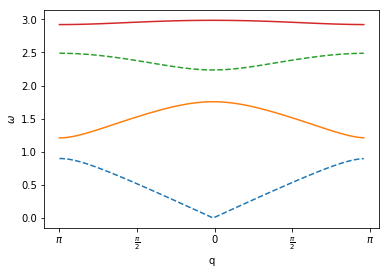

In [140]:
if __name__ == "__main__":
    e_val, e_vec = main(m1 = 0.4, m2 = 1.0)
    #print(e_val)
    #print(e_vec)

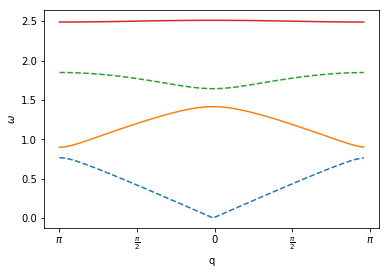

In [141]:
if __name__ == "__main__":
    e_val, e_vec = main(m1 = 1.0, m2 = 0.4)
    #print(e_val)
    #print(e_vec)

In [142]:
    # additional: 
    # * rename mat1 and mat2 to be more descriptive
    # * describe the result if the values of m1 and m2 are interchanged
    # * describe the effect of different values of f
    # optional challenging exercise: animate the eigenmodes as in Fig. 2.13


NameError: name 'mat2' is not defined

-In real life, we can only determine the numerical vibration modes because it is not possible to solve the matrix with infinite euqations of motion

- q --> exp(iqa) (translations because we are dealing with periodic boundary conditions) - Spatial Frequency, Mode

-Solving the matrix, we obtain complex eigenvalues - w^^2. Get the real part only in order to compute numerically.

